# Computer Vision With Deep Learning

## Introduction
* In this notebook, we will learn about computer vision and deep learning. 
* We will start by understanding the basics of computer vision and then move on to deep learning.
* We will also learn about convolutional neural networks (CNNs) and how they are used in computer vision.
* We will implement a simple CNN model using the Keras library and train it on the MNIST dataset.
* Finally, we will evaluate the model and visualize the results.

## Search and Download Images Using Bing Image Downloader

In [1]:
## install bing-image-downloader
# !pip install bing-image-downloader

In [2]:
from bing_image_downloader import downloader
#downloader.download("bird", limit=100, output_dir='images', adult_filter_off=True)

In [3]:
# downloader.download("skincancer", limit=100, output_dir='images', adult_filter_off=True)

### Completed the download of images

## Continue computer vision with deep learning

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


2024-07-27 13:03:43.592390: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-27 13:03:43.600847: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-27 13:03:43.610555: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-27 13:03:43.613383: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-27 13:03:43.620821: I tensorflow/core/platform/cpu_feature_guar

In [5]:
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# df = tf.keras.utils.image_dataset_from_directory("images/trafic-lights")


In [6]:
train_images.shape


(60000, 28, 28)

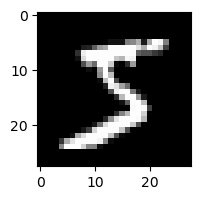

In [7]:
plt.figure(figsize=(3,2))
plt.imshow(train_images[0], cmap='gray')

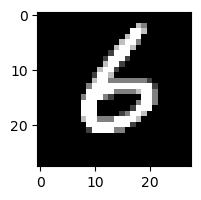

In [8]:
plt.figure(figsize=(3,2))
plt.imshow(train_images[66], cmap='gray')

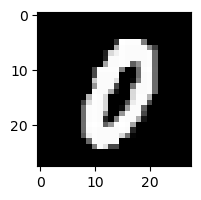

In [9]:
plt.figure(figsize=(3,2))
plt.imshow(train_images[34], cmap='gray')

In [10]:
train_labels[0]

5

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
# train_images[61]

## Normalizing the data
When dividing by 255, we are normalizing the data. 
This is because the pixel values range from 0 to 255. 
By dividing by 255, we are scaling the pixel values to be between 0 and 1.

### Normalize formula

<img src="Normalization-Formula.jpg" width="400">

In [13]:
train_images = train_images / 255.0
test_images = test_images / 255.0
# Question: Why do we divide by 255?
# Answer: We divide by 255 to normalize the pixel values. The pixel values range from 0 to 255, and by dividing by 255, we are scaling the pixel values to be between 0 and 1. This helps the model learn better and faster. 

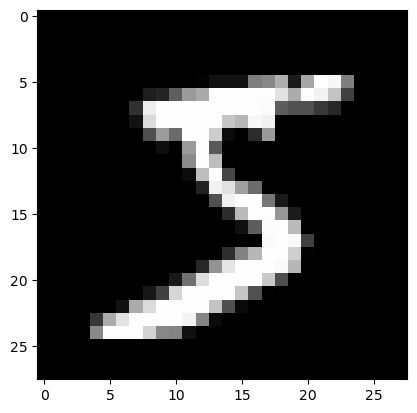

In [14]:
plt.imshow(train_images[0], cmap='gray')

## Convolutional Neural Network - CNN - Image Classification

### CNN
<img src="cnn1.png" width="500">

---

### CNN
<img src="cnn2.png" width="500">
---

### CNN
<img src="cnn3.png" width="500">
---

### CNN
<img src="cnn4.png" width="500">
---

### CNN
<img src="cnn5.png" width="500">

---







In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten

## Building the CNN model with Bird Images

### Step 1: Load the images
### Step 2: Preprocess the images
### Step 3: Build the CNN model
### Step 4: Compile the model
### Step 5: Train the model
### Step 6: Evaluate the model

<img src="bird-cnn.png" width="500">

In [16]:
model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
# 12 filters, each filter is 3x3. Q:What is kernel size? A: The kernel size is the size of the filter that is applied to the input image. 
# In this case, the kernel size is 3x3, which means that the filter is a 3x3 matrix that is applied to the input image.
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

I0000 00:00:1722074625.198090  423642 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-07-27 13:03:45.218451: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [17]:
history = model.fit(train_images, train_labels, validation_split=0.20, epochs=10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8473 - loss: 0.5354 - val_accuracy: 0.9509 - val_loss: 0.1916
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9509 - loss: 0.1727 - val_accuracy: 0.9670 - val_loss: 0.1226
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9682 - loss: 0.1133 - val_accuracy: 0.9748 - val_loss: 0.0922
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9759 - loss: 0.0852 - val_accuracy: 0.9771 - val_loss: 0.0839
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9810 - loss: 0.0652 - val_accuracy: 0.9783 - val_loss: 0.0760
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9835 - loss: 0.0570 - val_accuracy: 0.9798 - val_loss: 0.0708
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9857 - loss: 0.0496 - val_accuracy: 0.9792 - val_loss: 0.0704
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9870 - loss: 0.0448 - 

In [18]:
loss, accuracy = model.evaluate(test_images, test_labels)
loss, accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 583us/step - accuracy: 0.9764 - loss: 0.0740


(0.06267642229795456, 0.9801999926567078)

In [19]:
model.save("my-handwritten-recognition-model.keras")

## Improve the model

### Technique1: Increase the number of layers

In [19]:
model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(Dense(units=128)) # add a dense layer with 128 units and relu activation
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Technique2: Increase the number of neurons

In [ ]:
model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(Dense(units=128)) # add a dense layer with 128 units and relu activation
model.
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Technique3: add dropout layer to prevent overfitting

In [19]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(Dense(units=128)) # add a dense layer with 128 units and relu activation
model.add(Dropout(0.5)) # add a dropout layer with a dropout rate of 0.5
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Technique4: Batch normalization

In [19]:
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(InputLayer(shape=(28, 28))) # images are 28x28 pixels
model.add(Reshape(target_shape=(28, 28, 1))) # reshape the images to 28x28x1
model.add(Conv2D(filters=12, kernel_size=(3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) # max pooling with a pool size of 2x2
model.add(Flatten()) # flatten the output of the convolutional layers
model.add(BatchNormalization()) # add a batch normalization layer
model.add(Dense(units=128)) # add a dense layer with 128 units and relu activation
model.add(Dropout(0.25)) # add a dropout layer with a dropout rate of 0.5
model.add(Dense(units=10)) # output layer with 10 units (one for each digit) 
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

### Technique5: Data Augmentation